In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src import SHRaman, plotBifDiags, animateBifDiag, params

In [2]:
%matplotlib inline

Int64Index([4608, 7183], dtype='int64')
['-', '--', '-']
Int64Index([0, 1112], dtype='int64')
['-', '-', '--']
Int64Index([0, 1111], dtype='int64')
['-', '-', '--']
Int64Index([189270, 190246, 191085, 191854, 192657, 193440, 194235, 195025,
            195823, 196648, 197498, 198323, 199121, 199911, 200707, 201490,
            202293, 203062, 203904, 204875],
           dtype='int64')
['--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--', '-', '--']


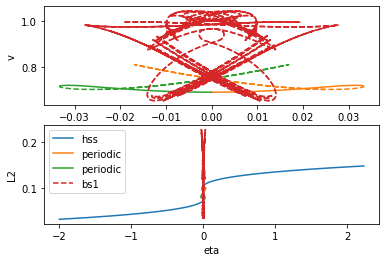

In [5]:
plotBifDiags('hss_gamma=0.24', 'periodic_gamma=0.24', 'periodic_back_gamma=0.24', 'bs1_gamma=0.14')

In [3]:
shr = SHRaman(branch='ds1_gamma=0.24', **params)

In [4]:
df = pd.read_csv(shr.branchfolder + 's.csv')

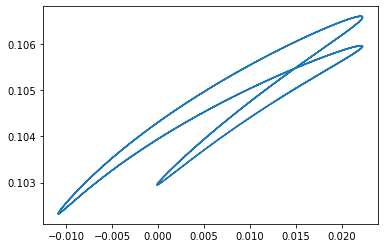

In [5]:
plt.plot(df['eta'], df['L2'])
plt.show()

In [15]:
start_point = df.iloc[0]
dist = (df['eta'] - start_point['eta']) ** 2 + (df['L2'] - start_point['L2'])**2
return_point = df[dist < 1e-10].index[1]

In [16]:
df_reduced = df.iloc[:return_point]

In [ ]:
df2 = df


In [29]:
i = df[df['eta'] == df['eta'].max()].index[0]
i

2797

In [30]:
df_reduced = df.iloc[:i+1]

In [18]:
df_reduced.to_csv(shr.branchfolder + 's.csv')

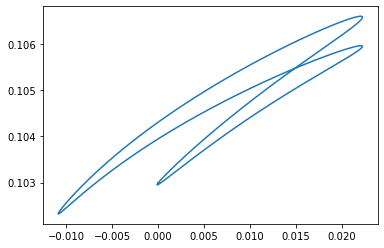

In [17]:
plt.plot(df_reduced['eta'], df_reduced['L2'])

In [14]:
df_reduced[df_reduced['branch'] == 1]['stability'].iloc[0] == 'unstable'

True

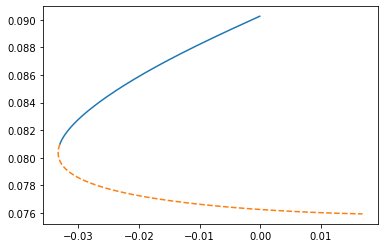

In [32]:
branch_count = 0
while True:
    df_r = df_reduced[df_reduced['branch'] == branch_count]
    if len(df_r) == 0:
        break

    stability = df_r['stability'].iloc[1]
    line = '--' if stability == 'unstable' else '-'

    plt.plot(df_r['eta'], df_r['L2'], line)

    branch_count += 1
plt.show()

    